In [4]:
from mundilib import MundiCatalogue
from utils import height2width
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Init wms
c = MundiCatalogue()
wms = c.get_collection("Sentinel2").mundi_wms('L2A')

In [5]:
legend_data = [[0, [0, 0, 0], 'No Data'],
              [1, [1, 0, 0.016], 'Saturated / Defective'],
              [2, [0.525, 0.525, 0.525], 'Dark Area'],
              [3, [0.467, 0.298, 0.043], 'Cloud shadows'],
              [4, [0.063, 0.827, 0.176], 'Vegetation'],
              [5, [1, 1, 0.325], 'Bare soil'],
              [6, [0, 0, 1], 'Water'],
              [7, [0.506, 0.506, 0.506], 'Clouds low probability / Unclassified'],
              [8, [0.753, 0.753, 0.753], 'Clouds medium probability'],
              [9, [0.949, 0.949, 0.949], 'Clouds high probability'],
              [10, [0.733, 0.773, 0.925], 'Cirrus'],
              [11, [0.325, 1, 0.980], 'Snow / Ice']]

legend_dict = dict()
for values in legend_data:
    legend_dict[values[0]] = values[2]


In [24]:
_projection_ = 'EPSG:4326'
_bbox_       = (15.68727199494822, 44.6026039846487, 16.10475246369822, 44.8003578908987)
_time_       = '2022-05-06/2023-05-10'
_height_     = 512
_width_      = height2width(_bbox_, _height_)

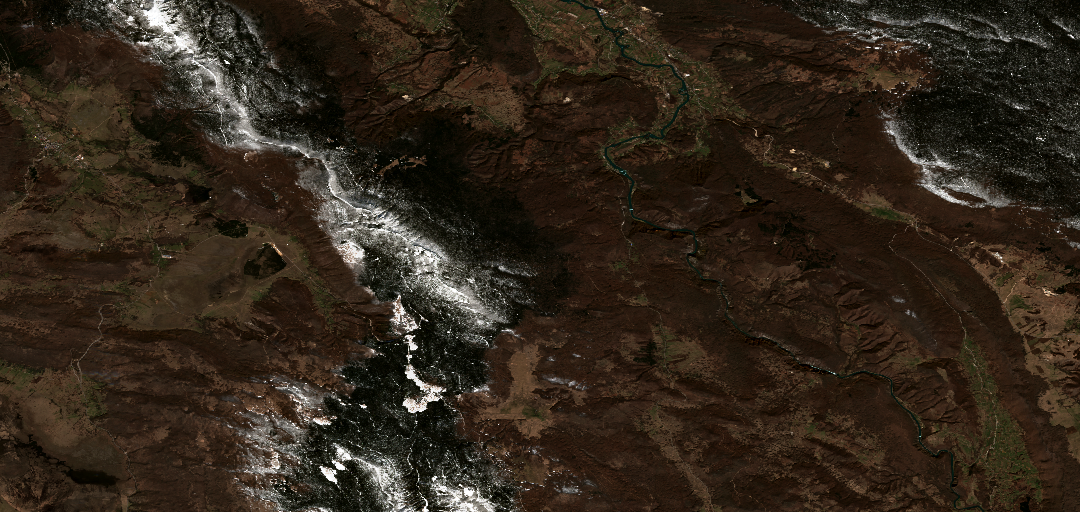

In [25]:
img_tc = wms.getmap(layers=['TRUE_COLOR'],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

display(Image.open(img_tc))

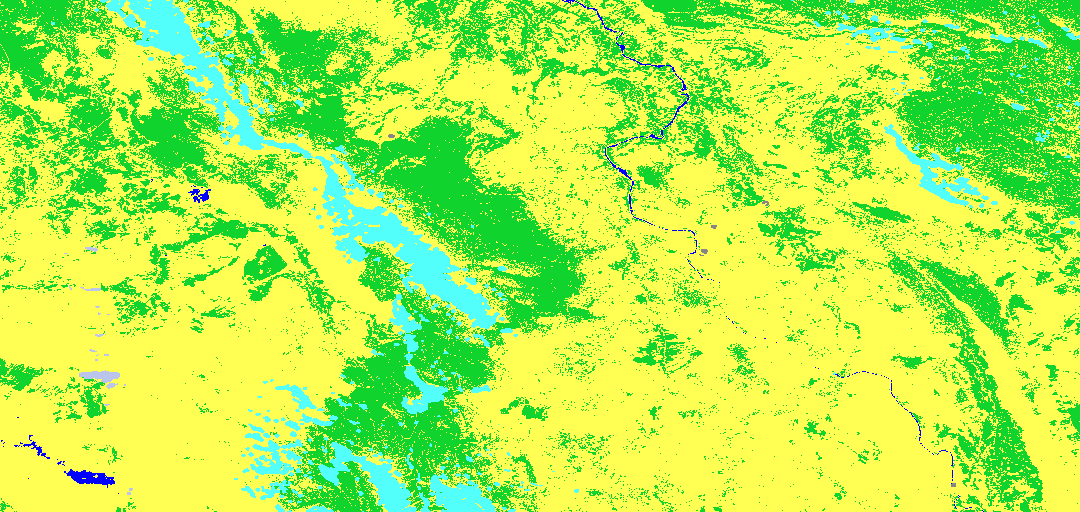

In [26]:
img_scl = wms.getmap(layers=['SCL'],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

display(Image.open(img_scl))

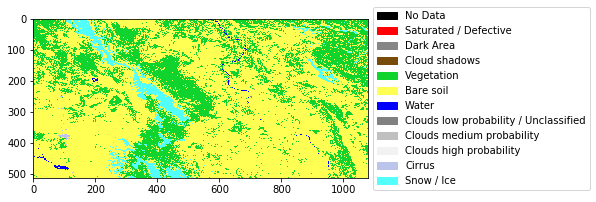

In [27]:
img_scl = wms.getmap(layers=['SCL'],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

scl_array = np.asarray(Image.open(img_scl))

handles = [
    Rectangle((0,0),1,1, color = c) for k,c,n in legend_data
]
labels = [n for k,c,n in legend_data]

plt.imshow(scl_array)
plt.legend(handles,labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

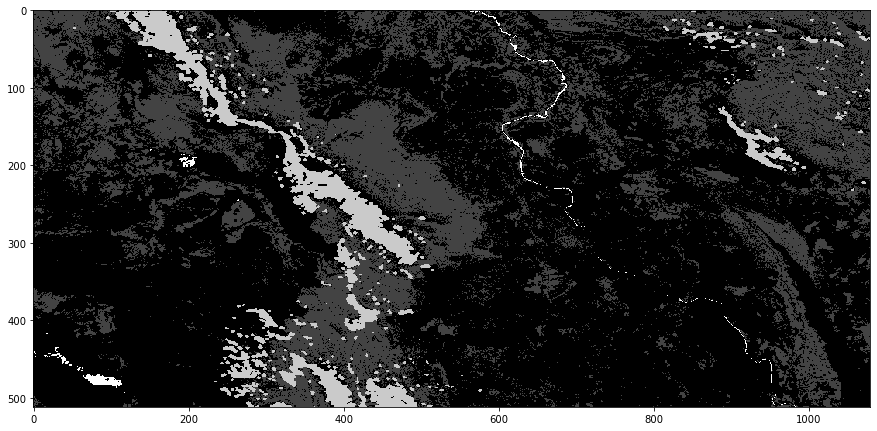

In [28]:
img_scl_raw = wms.getmap(layers=['SCL_GRAYSCALE'],
                     srs=_projection_,
                     bbox=_bbox_,
                     size=(_width_, _height_),
                     format='image/tiff',
                     time=_time_,
                     showlogo=False,
                     transparent=False)

scl_raw_array = np.asarray(Image.open(img_scl_raw))
scl_raw_array = scl_raw_array // 23

grid = np.zeros(scl_raw_array.shape)

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if scl_raw_array[i][j] == 6:
            grid[i][j] = 0.95
        elif scl_raw_array[i][j] == 11:
            grid[i][j] = 0.75
        elif scl_raw_array[i][j] == 4:
            grid[i][j] = 0.25
        else:
            grid[i][j] = 0.0
            
plt.figure(figsize=(15, 15))
plt.imshow(grid, cmap='gray')
plt.show()